In [27]:
import matplotlib.pyplot as plt
import sympy as sp
import matplotlib as mpl
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
from sympy.parsing.sympy_parser import parse_expr

# 0) Setup
mpl.rcParams['text.usetex'] = False
plt.style.use('seaborn-v0_8-whitegrid')

In [7]:
pow2 = lambda x: x ** 2
pow3 = lambda x: x ** 3
pow4 = lambda x: x ** 4
pow5 = lambda x: x ** 5

# Dijet Results

In [3]:
raw_equations = [
    '0.24386146656210966',
    '0.6659794192370385 / x1',
    'pow2(0.1621653779133296 / x1)',
    '(0.059419669357153496 / x1) / x2',
    'pow3(0.3686895696283121 / (x1 + x2))',
    'pow3(exp(-0.9995436690905848) / (x2 + x1))',
    'exp(((x1 + x2) + -0.2901637250235071) / -0.04594133847567203)',
    'exp((pow2(x1 + x2) + -0.057561350117369466) / -0.011153992322195964)',
    'exp(x2 + ((-0.053003042936724615 + pow2(x2 + x1)) / -0.010215003522643243))',
    'exp((((1.660897105918425 * x2) + -0.41385191494248) + x1) / -0.037730317274971434) * x2',
    'exp(((x1 + -0.4146627863348564) + (1.58454898746801 * x2)) / -0.03921766888842068) * (0.005670843459157224 + x2)',
    'exp(((x1 + ((pow2(x1) + x2) * 2.0384914873027378)) + -0.5134143355965527) / -0.04766492270321992) * x2',
    'exp((pow2(x1 + x1) + ((x2 * pow2(-0.8626039025357024)) + -0.19190824848121446)) / -0.019102451474865056) * x2',
    'x2 * exp(((-0.19210692205949076 + (pow3(pow2(0.9520949593660861)) * x2)) + pow2(x1 + x1)) / -0.01912229633274933)',
    '(exp((pow2(x1 + x1) + (-0.19190824848121446 + (x2 * pow2(-0.8626039025357024)))) / -0.019102451474865056) * x2) + 0.006615436070646318',
    'x2 * exp((-0.4675031453767382 + (x1 + ((pow2((-0.10508860399108047 + x1) + x1) + x2) * 1.7489499784859923))) / -0.04372675797408531)',
    'x2 * exp(((x1 + ((pow2(log(x1 + 0.8972846235752936) + x1) + x2) * 1.75140286680354)) + -0.46935641574769205) / -0.04393007306510443)',
    'x2 * exp((-0.46935640478694823 + (x1 + (pow2(1.3235999105888792) * (pow2(x1 + log(x1 + 0.8972846386855484)) + x2)))) / -0.0439299300461395)',
    '0.006457861735561451 + (exp((((1.7514028714887608 * (pow2(x1 + log(x1 + 0.8972846386855484)) + x2)) + -0.46935640478694823) + x1) / -0.0439299300461395) * x2)',
    '(0.008724380698537688 / x1) + (exp(((((x2 + pow2((x1 + -0.10482564710643719) + x1)) * 1.7521459812332831) + -0.46673804570350047) + x1) / -0.04362432760294058) * x2)',
    '(pow3(0.23060112529313992) / x1) + (exp(((((x2 + pow2((x1 + -0.10482564710643719) + x1)) * 1.7521459812332831) + -0.46673804570350047) + x1) / -0.04362432760294058) * x2)',
    '(pow3(pow2(-3.317225918935838 * x2)) + x2) * exp(((((x2 + pow2((x1 + -0.10482564710643719) + x1)) * 1.7521459812332831) + -0.46673804570350047) + x1) / -0.04362432760294058)',
    'exp(((-0.46587045806884375 + (1.7442570511798632 * (x2 + pow2((x1 + -0.10482554167782034) + x1)))) + x1) / -0.0435484185567603) * (exp(2.5276047702888493 + pow3(log(x2))) + x2)',
    '(x2 + pow2(pow3(x2 / -0.09992112922302912) * x1)) * exp(((((pow2(-0.10482564710643719 + (x1 + x1)) + x2) * 1.748924238841506) + x1) + -0.4664590061044818) / -0.0436014489106141)',
    'exp(((1.7444606403416665 * (x2 + pow2(-0.10482564710643719 + (x1 + x1)))) + (x1 + -0.4651430951236344)) / -0.04345676323011133) * (pow3(x2 * pow2((x2 + x1) / 0.1440279932030374)) + x2)',
]

complexity = [
    1,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    11,
    12,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    26,
    27,
    29,
]

loss = [
    16.549502913303225,
    12.416941363256962,
    11.058165816453204,
    7.817460946647302,
    1.049168823613731,
    1.0489859492163074,
    0.2578048230387811,
    0.0593058930816375,
    0.0495334249060585,
    0.0404320731231053,
    0.030783354347646,
    0.0237013574440044,
    0.0070203630349114,
    0.0070100393780155,
    0.0069758499155086,
    0.00552920780687,
    0.0053776760122903,
    0.0053734624397104,
    0.005336369936815,
    0.0048197023053441,
    0.0047765832094364,
    0.0045957466493013,
    0.0035213699876991,
    0.0028934959697824,
    0.0026682019413983,
]



Original: 0.24386146656210966
Processed: 0.240000000000000
LaTeX: 0.24

Original: 0.6659794192370385 / x1
Processed: 0.67/x1
LaTeX: \frac{0.67}{x_{1}}

Original: pow2(0.1621653779133296 / x1)
Processed: pow2(0.16/x1)
LaTeX: \operatorname{pow}_{2}{\left(\frac{0.16}{x_{1}} \right)}

Original: (0.059419669357153496 / x1) / x2
Processed: 0.059/(x1*x2)
LaTeX: \frac{0.059}{x_{1} x_{2}}

Original: pow3(0.3686895696283121 / (x1 + x2))
Processed: pow3(0.37/(x1 + x2))
LaTeX: \operatorname{pow}_{3}{\left(\frac{0.37}{x_{1} + x_{2}} \right)}

Original: pow3(exp(-0.9995436690905848) / (x2 + x1))
Processed: pow3(0.37/(x1 + x2))
LaTeX: \operatorname{pow}_{3}{\left(\frac{0.37}{x_{1} + x_{2}} \right)}

Original: exp(((x1 + x2) + -0.2901637250235071) / -0.04594133847567203)
Processed: 550.0*exp(-22.0*x1 - 22.0*x2)
LaTeX: 550.0 e^{- 22.0 x_{1} - 22.0 x_{2}}

Original: exp((pow2(x1 + x2) + -0.057561350117369466) / -0.011153992322195964)
Processed: 170.0*exp(-90.0*pow2(x1 + x2))
LaTeX: 170.0 e^{- 90.0 \oper

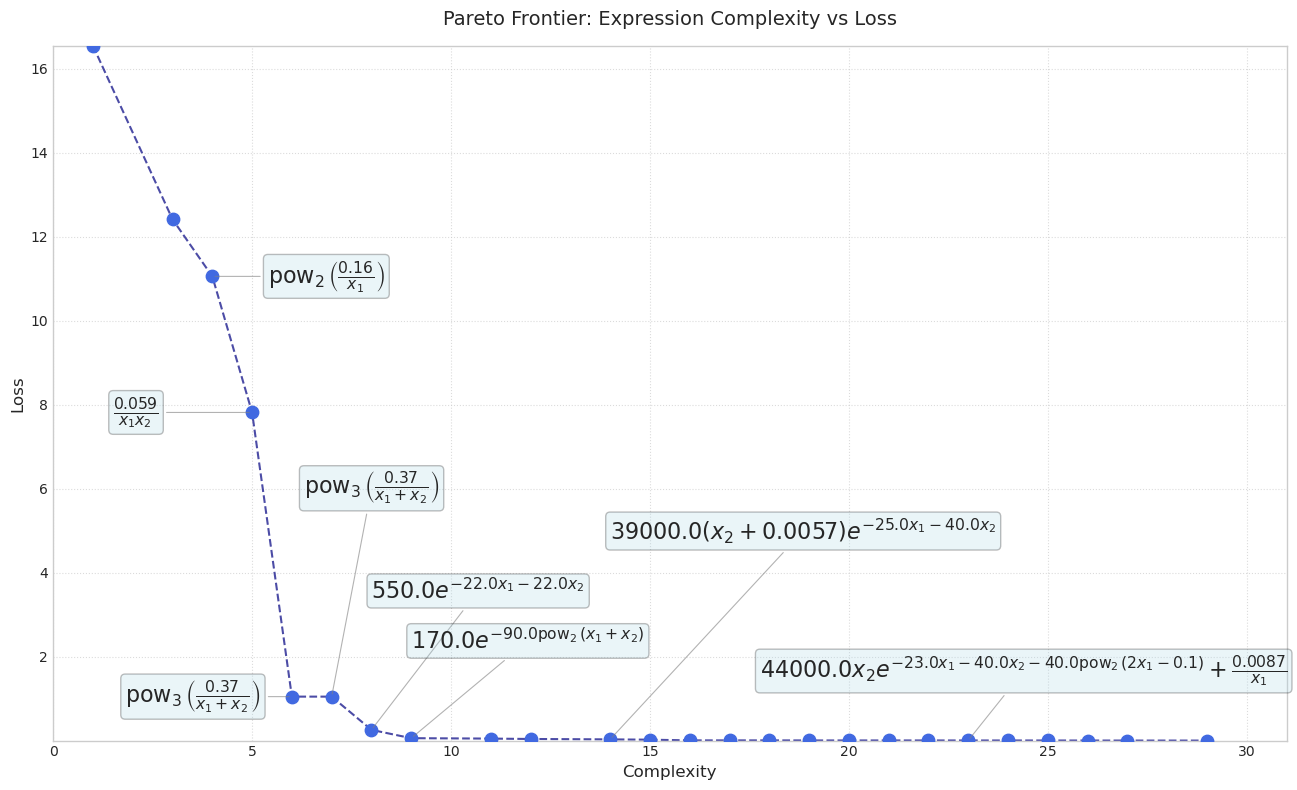

In [4]:
range_of_interest = (1, 48)
indices_of_interest = [i for i, c in enumerate(complexity) if range_of_interest[0] <= c <= range_of_interest[1]]
complexity = [complexity[i] for i in indices_of_interest]
loss = [loss[i] for i in indices_of_interest]
raw_equations = [raw_equations[i] for i in indices_of_interest]

# 2) Sympy setup
x1, x2 = sp.symbols('x1 x2')

# 3) Custom function to round constants only (not function arguments)
def round_constants(expr, ndigits=1):
    """
    Round every bare Float in `expr` so that, when printed,
    it has exactly `ndigits` digits after the decimal point
    in scientific notation (i.e. nd+1 significant figures).
    """
    def _is_leaf_float(e):
        return e.is_Float and not e.args

    def _round_sci(e):
        f = float(e)
        # format with `ndigits` places after the decimal in the mantissa:
        sci_str = f"{f:.{ndigits}e}"
        return sp.Float(sci_str)

    return expr.replace(_is_leaf_float, _round_sci)

# 4) Function to convert pow2 to squared form without evaluation
def convert_pow2(expr):
    # Find all pow2 calls
    if expr.func.__name__ == 'pow2':
        return sp.Pow(convert_pow2(expr.args[0]), 2, evaluate=False)
    # Recurse through expression
    return expr.func(*[convert_pow2(arg) for arg in expr.args]) if expr.args else expr

def convert_pow3(expr):
    # Find all pow3 calls
    if expr.func.__name__ == 'pow3':
        return sp.Pow(convert_pow3(expr.args[0]), 3, evaluate=False)
    # Recurse through expression
    return expr.func(*[convert_pow3(arg) for arg in expr.args]) if expr.args else expr

def convert_pow4(expr):
    # Find all pow4 calls
    if expr.func.__name__ == 'pow4':
        return sp.Pow(convert_pow4(expr.args[0]), 4, evaluate=False)
    # Recurse through expression
    return expr.func(*[convert_pow4(arg) for arg in expr.args]) if expr.args else expr

def convert_pow5(expr):
    # Find all pow5 calls
    if expr.func.__name__ == 'pow5':
        return sp.Pow(convert_pow5(expr.args[0]), 5, evaluate=False)
    # Recurse through expression
    return expr.func(*[convert_pow5(arg) for arg in expr.args]) if expr.args else expr

# 4) Function to convert pow_int without evaluation
def convert_pow_int(expr):
    # Find all pow_int calls
    if expr.func.__name__ == 'pow_int':
        base, exp = expr.args
        # If exp is literally an integer, convert to a Python int
        if exp.is_integer and exp.is_number:
            exp = int(exp)
        # Otherwise leave exp symbolic
        return sp.Pow(convert_pow_int(base), convert_pow_int(exp), evaluate=False)

    # Recursively descend into all other function applications
    if expr.args:
        return expr.func(*[convert_pow_int(arg) for arg in expr.args])
    else:
        return expr

# 5) Build MathText labels
latex_labels = []
exprs_final = []
for s in raw_equations:
    try:
        # Pre-process pow2 -> custom function
        s_processed = s.replace('pow2', 'pow2_func')
        s_processed = s.replace('pow3', 'pow3_func')
        s_processed = s.replace('pow4', 'pow4_func')
        s_processed = s.replace('pow5', 'pow5_func')
        s_processed = s_processed.replace('pow_int', 'pow_int_func')
        
        # Define custom functions
        locals_dict = {
            'x1': x1,
            'x2': x2,
            'pow2_func': sp.Function('pow2'),
            'pow3_func': sp.Function('pow3'),
            'pow4_func': sp.Function('pow4'),
            'pow5_func': sp.Function('pow5'),
            'pow_int_func': sp.Function('pow_int'),
            'asin': sp.asin,
            'atan': sp.atan,
            'tan': sp.tan,
            'exp': sp.exp,
        }
        
        # Parse while preserving structure
        expr = parse_expr(s_processed, evaluate=False, local_dict=locals_dict)
        
        # Convert pow2_func to squared form
        expr_converted_pow2 = convert_pow2(expr)
        expr_converted_pow3 = convert_pow3(expr)
        expr_converted_pow4 = convert_pow4(expr)
        expr_converted_pow5 = convert_pow5(expr)
        expr_converted = convert_pow_int(expr_converted_pow5)
        
        # Round constants (only standalone floats)
        expr_converted_int1 = round_constants(expr_converted)
        expr_converted_int2 = round_constants(expr_converted_int1)
        expr_final = round_constants(expr_converted_int2)
        # expr_final = expr_final.simplify()
        # expr_final = expr_final.expand()
        exprs_final.append(expr_final)

        # Get MathText-friendly LaTeX
        mt = sp.latex(expr_final)
        latex_labels.append(f"${mt}$")
        
        # Debug print
        print(f"Original: {s}")
        print(f"Processed: {expr_final}")
        print(f"LaTeX: {mt}\n")
    except Exception as e:
        print(f"Error processing expression: {s}\n{e}")
        latex_labels.append(f"Error: {s}")

# 6) Manual offsets for clarity
offsets = [
    (0, 0), (0, 0), (40, 0), (-100, 0), (-120, 0),
    (-20, 150), (0,100), (0, 70), (0, 0), (0, 0),
    (0, 150), (0, 0), (0, 0), (0, 0), (0, 0),
    (0, 0), (0, 0), (0, 0), (0, 0), (-150, 50)
]

# 7) Plot
fig, ax = plt.subplots(figsize=(14, 8))
ax.scatter(complexity, loss, s=80, zorder=3, color='royalblue')
ax.plot(complexity, loss, linestyle='--', alpha=0.7, zorder=2, color='navy')

# Set axis limits
ax.set_xlim(min(complexity) - 1, max(complexity) + 2)
ax.set_ylim(min(loss) - 0.0005, max(loss))
fig.subplots_adjust(right=0.75)


skip_indices = []
keep_indices = [3-1, 4-1, 5-1, 6-1, 7-1, 8-1, 11-1, 20-1]
# Annotate with MathText labels
for i, (x, y, lbl, (dx, dy)) in enumerate(zip(complexity, loss, latex_labels, offsets)):
    if i in skip_indices or (i not in keep_indices):
        continue
    ax.annotate(
        lbl,
        xy=(x, y),
        xytext=(dx, dy),
        textcoords='offset points',
        ha='left',
        va='center',
        fontsize=16,
        bbox=dict(boxstyle='round,pad=0.2', alpha=0.25, fc='lightblue'),
        arrowprops=dict(arrowstyle='-', lw=0.8, alpha=0.6, color='gray')
    )

ax.set_title("Pareto Frontier: Expression Complexity vs Loss", fontsize=14, pad=15)
ax.set_xlabel("Complexity", fontsize=12)
ax.set_ylabel("Loss", fontsize=12)
ax.grid(True, linestyle=':', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

In [5]:
# --- after your existing code that builds exprs_final ---

# 1) Simplify each expression
simplified_exprs = [sp.simplify(expr) for expr in exprs_final]
rounded_simplified_exprs = [round_constants(expr) for expr in simplified_exprs]

# 2) Print them in LaTeX form
for i, expr in enumerate(exprs_final, 1):
    latex_str = sp.latex(expr)
    print(f"Expr {i} original: ${latex_str}$")


print("\n--- Simplified Expressions ---\n")
# 2) Print them in LaTeX form
for i, expr in enumerate(rounded_simplified_exprs, 1):
    latex_str = sp.latex(expr)
    print(f"Expr {i}, complexity {complexity[i-1]} simplified: ${latex_str}$")

Expr 1 original: $0.24$
Expr 2 original: $\frac{0.67}{x_{1}}$
Expr 3 original: $\operatorname{pow}_{2}{\left(\frac{0.16}{x_{1}} \right)}$
Expr 4 original: $\frac{0.059}{x_{1} x_{2}}$
Expr 5 original: $\operatorname{pow}_{3}{\left(\frac{0.37}{x_{1} + x_{2}} \right)}$
Expr 6 original: $\operatorname{pow}_{3}{\left(\frac{0.37}{x_{1} + x_{2}} \right)}$
Expr 7 original: $550.0 e^{- 22.0 x_{1} - 22.0 x_{2}}$
Expr 8 original: $170.0 e^{- 90.0 \operatorname{pow}_{2}{\left(x_{1} + x_{2} \right)}}$
Expr 9 original: $180.0 e^{x_{2} - 98.0 \operatorname{pow}_{2}{\left(x_{1} + x_{2} \right)}}$
Expr 10 original: $58000.0 x_{2} e^{- 27.0 x_{1} - 44.0 x_{2}}$
Expr 11 original: $39000.0 \left(x_{2} + 0.0057\right) e^{- 25.0 x_{1} - 40.0 x_{2}}$
Expr 12 original: $48000.0 x_{2} e^{- 21.0 x_{1} - 43.0 x_{2} - 43.0 \operatorname{pow}_{2}{\left(x_{1} \right)}}$
Expr 13 original: $23000.0 x_{2} e^{- 52.0 x_{2} \operatorname{pow}_{2}{\left(-0.86 \right)} - 52.0 \operatorname{pow}_{2}{\left(2 x_{1} \right)}}$

In [6]:
# In a Jupyter notebook cell

# 0) Enable pretty printing with LaTeX
from sympy import init_printing, simplify
from IPython.display import display

init_printing(use_latex='mathjax')  # now Sympy objects show up as LaTeX

# 1) Simplify every expression in your list
simplified_exprs = [simplify(expr) for expr in exprs_final]
rounded_simplified_exprs = [round_constants(expr) for expr in simplified_exprs]

# 2) Display each one inline
for i, expr in enumerate(rounded_simplified_exprs, 1):
    display(expr)         # pretty-prints the Sympy object
    # If you want an explicit LaTeX string instead, you can do:
    # from sympy import latex
    # display(Latex(f"${latex(expr)}$"))

0.240000000000000

0.67
────
 x₁ 

    ⎛0.16⎞
pow₂⎜────⎟
    ⎝ x₁ ⎠

0.059
─────
x₁⋅x₂

    ⎛ 0.37  ⎞
pow₃⎜───────⎟
    ⎝x₁ + x₂⎠

    ⎛ 0.37  ⎞
pow₃⎜───────⎟
    ⎝x₁ + x₂⎠

       -22.0⋅x₁ - 22.0⋅x₂
550.0⋅ℯ                  

       -90.0⋅pow₂(x₁ + x₂)
170.0⋅ℯ                   

       x₂ - 98.0⋅pow₂(x₁ + x₂)
180.0⋅ℯ                       

            -27.0⋅x₁ - 44.0⋅x₂
58000.0⋅x₂⋅ℯ                  

                      -25.0⋅x₁ - 40.0⋅x₂
(39000.0⋅x₂ + 220.0)⋅ℯ                  

            -21.0⋅x₁ - 43.0⋅x₂ - 43.0⋅pow₂(x₁)
48000.0⋅x₂⋅ℯ                                  

            -52.0⋅x₂⋅pow₂(-0.86) - 52.0⋅pow₂(2⋅x₁)
23000.0⋅x₂⋅ℯ                                      

            -52.0⋅x₂⋅pow₃(pow₂(0.95)) - 52.0⋅pow₂(2⋅x₁)
23000.0⋅x₂⋅ℯ                                           

            -52.0⋅x₂⋅pow₂(-0.86) - 52.0⋅pow₂(2⋅x₁)         
23000.0⋅x₂⋅ℯ                                       + 0.0066

            -23.0⋅x₁ - 40.0⋅x₂ - 40.0⋅pow₂(2⋅x₁ - 0.11)
44000.0⋅x₂⋅ℯ                                           

            -23.0⋅x₁ - 40.0⋅x₂ - 40.0⋅pow₂(x₁ + log(x₁ + 0.9))
44000.0⋅x₂⋅ℯ                                                  

            -23.0⋅x₁ - 23.0⋅(x₂ + pow₂(x₁ + log(x₁ + 0.9)))⋅pow₂(1.3)
44000.0⋅x₂⋅ℯ                                                         

            -23.0⋅x₁ - 40.0⋅x₂ - 40.0⋅pow₂(x₁ + log(x₁ + 0.9))         
44000.0⋅x₂⋅ℯ                                                   + 0.0065

            -23.0⋅x₁ - 40.0⋅x₂ - 40.0⋅pow₂(2⋅x₁ - 0.1)   0.0087
44000.0⋅x₂⋅ℯ                                           + ──────
                                                           x₁  

            -23.0⋅x₁ - 40.0⋅x₂ - 40.0⋅pow₂(2⋅x₁ - 0.1)   pow₃(0.23)
44000.0⋅x₂⋅ℯ                                           + ──────────
                                                             x₁    

                                    -23.0⋅x₁ - 40.0⋅x₂ - 40.0⋅pow₂(2⋅x₁ - 0.1)
44000.0⋅(x₂ + pow₃(pow₂(-3.3⋅x₂)))⋅ℯ                                          

⎛                       pow₃(log(x₂))⎞  -23.0⋅x₁ - 40.0⋅x₂ - 40.0⋅pow₂(2⋅x₁ -  ↪
⎝44000.0⋅x₂ + 570000.0⋅ℯ             ⎠⋅ℯ                                       ↪

↪ 0.1)
↪     

                                        -23.0⋅x₁ - 40.0⋅x₂ - 40.0⋅pow₂(2⋅x₁ -  ↪
44000.0⋅(x₂ + pow₂(x₁⋅pow₃(-10.0⋅x₂)))⋅ℯ                                       ↪

↪ 0.1)
↪     

                                               -23.0⋅x₁ - 40.0⋅x₂ - 40.0⋅pow₂( ↪
45000.0⋅(x₂ + pow₃(x₂⋅pow₂(6.9⋅x₁ + 6.9⋅x₂)))⋅ℯ                                ↪

↪ 2⋅x₁ - 0.1)
↪            